In [1]:
## analize results survival 

#exstrongsel: 0.001
#estrongsel: 0.01
#strongsel: 0.1
#moderatesel: 1

In [ ]:
# once i have wholegenome_offset.trees
import pandas as pd

import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import pandas as pd
import glob

In [ ]:
from data_for_plots import her_dict, sel_dict, poly_dict, freq_dict, optima_dict, freq_order, sel_order, optima_order, poly_h2_order, poly_order, freq_optima_order

In [ ]:
import itertools

In [ ]:
path2 = '/home/tbellagio/simulations/to_transfer/'
#'/home/tbellagio/scratch/slim_grenenet4gen/slim_grenenet/'

pop_size = pd.read_csv(path2 + 'pop_size_oct29.csv',  index_col=[0])

In [ ]:
pop_size = pop_size.reset_index()

In [10]:

pop_size['index'] = pop_size['index'].str.split('/subp').str[0]

pop_size['optima'] = pop_size['index'].str.split('/').str[-1]

pop_size['sel'] = pop_size['index'].str.split('/').str[-2]

pop_size['h2'] = pop_size['index'].str.split('/').str[-3]

pop_size['freq'] = pop_size['index'].str.split('_').str[-3]

pop_size['poly'] = pop_size['index'].str.split('_').str[-2]

pop_size['rep'] = pop_size['index'].str.split('_').str[-1].str.split('/').str[0]

pop_size = pop_size.drop('index',axis=1)

## maybe is a good idea to replace optima by extreme, mod and intermediate? 

pop_size = pop_size.replace({'optima-2': 'ex', 'optima-1': 'me', 'optima0': 'int', 'optima1': 'me', 'optima2': 'ex'})

In [11]:
pop_size

,0,1,2,3,4,5,6,7,8,optima,sel,h2,freq,poly,rep
0,2541.0,4486.0,6336.0,6526.0,6462.0,6496.0,6636.0,6434.0,6520.0,ex,moderatesel,highh,mediumfreq,monogen,3
1,2541.0,4732.0,6568.0,6506.0,6616.0,6511.0,6515.0,6506.0,6335.0,ex,moderatesel,highh,mediumfreq,monogen,3
2,2541.0,4497.0,6491.0,6424.0,6506.0,6477.0,6574.0,6424.0,6413.0,ex,moderatesel,highh,mediumfreq,monogen,3
3,2541.0,4730.0,6536.0,6568.0,6505.0,6518.0,6476.0,6407.0,6536.0,ex,moderatesel,highh,mediumfreq,monogen,3
4,2541.0,6559.0,6559.0,6598.0,6604.0,6530.0,6539.0,6540.0,6555.0,int,moderatesel,highh,mediumfreq,monogen,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22142,2541.0,472.0,81.0,6.0,NaN,NaN,NaN,NaN,NaN,me,exstrongsel,lowh,highfreq,onehpoly,1
22143,2541.0,385.0,38.0,11.0,NaN,NaN,NaN,NaN,NaN,me,exstrongsel,lowh,highfreq,onehpoly,1
22144,2541.0,356.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,me,exstrongsel,lowh,highfreq,onehpoly,1
22145,2541.0,412.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,me,exstrongsel,lowh,highfreq,onehpoly,1


In [12]:
survival_col = pop_size['8'].isna().replace({True: 0, False: 1})

In [13]:
pop_size['survival']= survival_col

In [14]:
survival = (pop_size.groupby(['optima', 'sel', 'freq', 'poly', 'h2', 'rep'])['survival'].sum() / pop_size.groupby(['optima', 'sel', 'freq', 'poly', 'h2', 'rep'])['survival'].size()) * 100

In [15]:
survival = survival.reset_index()

In [16]:
## filter only certain selection strength 

In [17]:
survival = survival[survival['sel'].isin(['moderatesel', 'strongsel',  'estrongsel', 'exstrongsel'])]

In [18]:
survival = survival.replace(poly_dict).replace(sel_dict).replace(her_dict).replace(freq_dict).replace(optima_dict)

In [19]:
survival['poly_h2'] = survival['poly'] +  '\n' + survival['h2']

In [20]:
survival['freq_optima'] = survival['optima'] + '\n' +  survival['freq']

In [21]:
greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors3 = greens + purples + oranges

In [22]:
freq_optima_order

['Common environments\nCausal loci\nfreq: 50-100%',
 'Common environments\nCausal loci\nfreq: 5-50%',
 'Common environments\nCausal loci\nfreq: 0-5%',
 'Intermediate environments\nCausal loci\nfreq: 50-100%',
 'Intermediate environments\nCausal loci\nfreq: 5-50%',
 'Intermediate environments\nCausal loci\nfreq: 0-5%',
 'Extreme environments\nCausal loci\nfreq: 50-100%',
 'Extreme environments\nCausal loci\nfreq: 5-50%',
 'Extreme environments\nCausal loci\nfreq: 0-5%']

In [23]:
#colors
#custom_colors = sns.color_palette("Greens", n_colors=3)

#colors_full = []

#for color in custom_colors:
#    colors_full.extend([color] * 3)
custom_color_dict = dict(zip(freq_optima_order, custom_colors3))

In [24]:
heritability_order = ['heritability 0.9', 'heritability 0.5', 'heritability 0.1']

<Figure size 432x288 with 0 Axes>

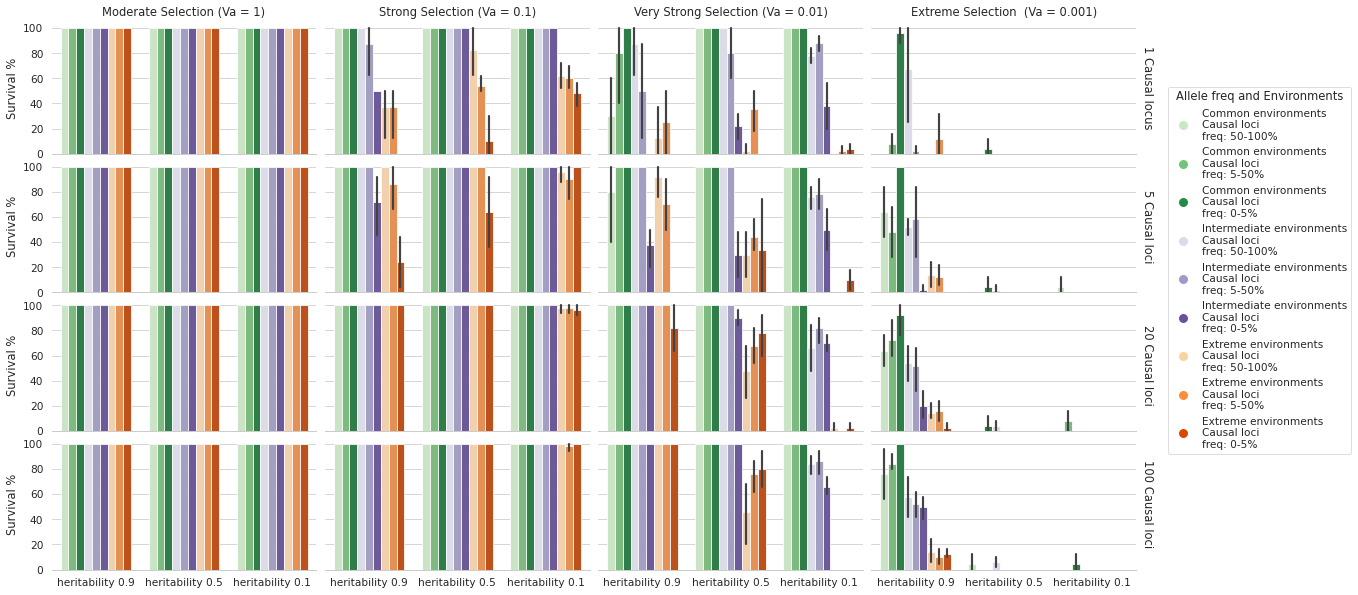

In [25]:
# height=1, aspect=1.3,
# font_scale=0.5

sns.set_context("paper", font_scale=1.2)
sns.despine(offset=0, trim=True);
#sns.set_style("ticks")
sns.set_style("whitegrid")
g = sns.catplot(data=survival, x='h2', y='survival', hue='freq_optima', col='sel', row='poly',
                margin_titles=True,
                row_order=poly_order, 
                col_order = sel_order,
                kind="bar",
                palette=custom_color_dict,
                hue_order=freq_optima_order,
                order=heritability_order,
                legend = False
               )
# Create a facet grid with two additional categorical variables
g.fig.set_figheight(8)
g.fig.set_figwidth(16)
#g.fig.suptitle('Survival %', y=1.02)
g.set_axis_labels('', 'Survival %')
#g.ax.yaxis.grid(True, linestyle='--', alpha=0.6)
g.despine(left=True)

#for ax in g.axes.flat:
#    for p in ax.patches:
#        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 10, f'{p.get_height():.0f}',
#                ha='center', va='top', color='grey',rotation = -90, fontsize= 8)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
#g.savefig("plot/Survival10gen.png")
# Show the plot
# Create legend handles and labels from the custom_color_dict_legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=key, 
                    markerfacecolor=value, markersize=10) for key, value in custom_color_dict.items()]
legend_labels = list(custom_color_dict.keys())
plt.legend(handles=legend_handles, labels=legend_labels, title='Allele freq and Environments', bbox_to_anchor=(1.1, 3.7), loc='upper left')#
g.savefig("plots/survivalgen10.png")

plt.show()

In [320]:
pop_size = pop_size.drop('survival',axis=1)


In [321]:
pop_size['poly_h2'] = pop_size['poly'] + pop_size['h2']


In [322]:
pop_size['freq-optima'] = pop_size['freq'] + '_' +  pop_size['optima']

In [324]:

selected_columns = ['optima','sel','h2','poly','freq', 'rep','poly_h2', 'freq-optima']
melted_pop_size = pop_size.melt(selected_columns, var_name='generation', value_name='pop_size')

melted_pop_size['pop_size'] = melted_pop_size['pop_size'].astype(float)



In [325]:
melted_pop_size = melted_pop_size.fillna(0)

In [331]:
pop_size

,0,1,2,3,4,5,6,7,8,optima,sel,h2,freq,poly,rep,poly_h2,freq-optima
0,2541.0,4486.0,6336.0,6526.0,6462.0,6496.0,6636.0,6434.0,6520.0,ex,moderatesel,highh,mediumfreq,monogen,3,monogenhighh,mediumfreq_ex
1,2541.0,4732.0,6568.0,6506.0,6616.0,6511.0,6515.0,6506.0,6335.0,ex,moderatesel,highh,mediumfreq,monogen,3,monogenhighh,mediumfreq_ex
2,2541.0,4497.0,6491.0,6424.0,6506.0,6477.0,6574.0,6424.0,6413.0,ex,moderatesel,highh,mediumfreq,monogen,3,monogenhighh,mediumfreq_ex
3,2541.0,4730.0,6536.0,6568.0,6505.0,6518.0,6476.0,6407.0,6536.0,ex,moderatesel,highh,mediumfreq,monogen,3,monogenhighh,mediumfreq_ex
4,2541.0,6559.0,6559.0,6598.0,6604.0,6530.0,6539.0,6540.0,6555.0,int,moderatesel,highh,mediumfreq,monogen,3,monogenhighh,mediumfreq_int
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22142,2541.0,472.0,81.0,6.0,NaN,NaN,NaN,NaN,NaN,me,exstrongsel,lowh,highfreq,onehpoly,1,onehpolylowh,highfreq_me
22143,2541.0,385.0,38.0,11.0,NaN,NaN,NaN,NaN,NaN,me,exstrongsel,lowh,highfreq,onehpoly,1,onehpolylowh,highfreq_me
22144,2541.0,356.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,me,exstrongsel,lowh,highfreq,onehpoly,1,onehpolylowh,highfreq_me
22145,2541.0,412.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,me,exstrongsel,lowh,highfreq,onehpoly,1,onehpolylowh,highfreq_me


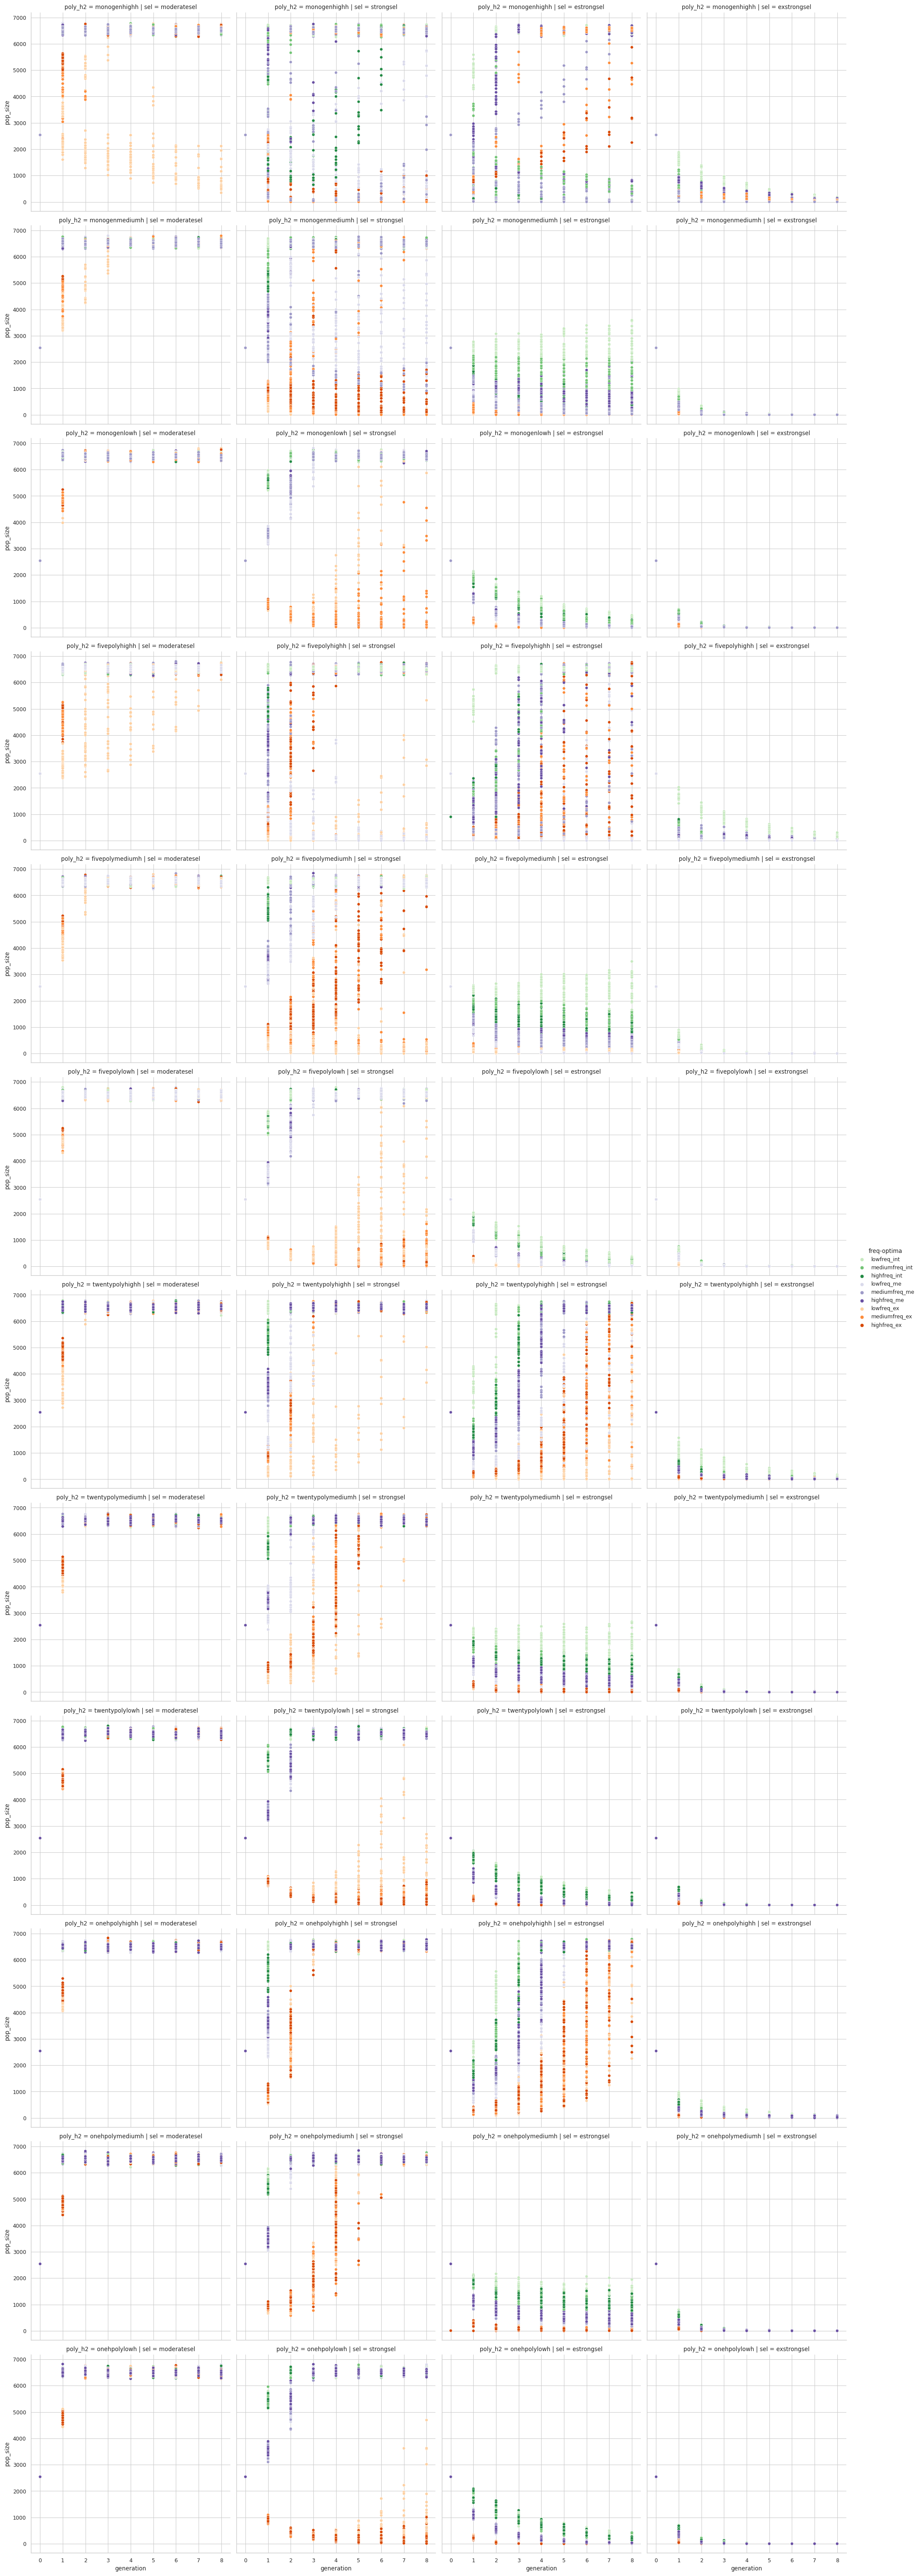

In [330]:
hue_order = ['lowfreq_int', 'mediumfreq_int', 'highfreq_int',
             'lowfreq_me', 'mediumfreq_me', 'highfreq_me',
       'lowfreq_ex', 'mediumfreq_ex', 'highfreq_ex',]

melted_pop_size['freq-optima'] = melted_pop_size['freq'] + '_' +  melted_pop_size['optima']

poly_h2_order = ['monogenhighh', 'monogenmediumh', 'monogenlowh',
                'fivepolyhighh', 'fivepolymediumh', 'fivepolylowh',
                'twentypolyhighh', 'twentypolymediumh', 'twentypolylowh',
                'onehpolyhighh', 'onehpolymediumh', 'onehpolylowh',]
greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(hue_order, custom_colors2))

g = sns.relplot(data=melted_pop_size, x="generation", y="pop_size", hue="freq-optima", col="sel", row="poly_h2",
                row_order = poly_h2_order,
                palette=custom_color_dict2,
                hue_order=hue_order,
                col_order = sel_order
                
           )

#g.savefig("Mean_fitness_time.png")
plt.show()

In [336]:
melted_pop_size[melted_pop_size['']]

,optima,sel,h2,poly,freq,rep,poly_h2,freq-optima,generation,pop_size
0,ex,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_ex,0,2541.0
1,ex,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_ex,0,2541.0
2,ex,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_ex,0,2541.0
3,ex,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_ex,0,2541.0
4,int,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_int,0,2541.0
...,...,...,...,...,...,...,...,...,...,...
199318,me,exstrongsel,lowh,onehpoly,highfreq,1,onehpolylowh,highfreq_me,8,0.0
199319,me,exstrongsel,lowh,onehpoly,highfreq,1,onehpolylowh,highfreq_me,8,0.0
199320,me,exstrongsel,lowh,onehpoly,highfreq,1,onehpolylowh,highfreq_me,8,0.0
199321,me,exstrongsel,lowh,onehpoly,highfreq,1,onehpolylowh,highfreq_me,8,0.0


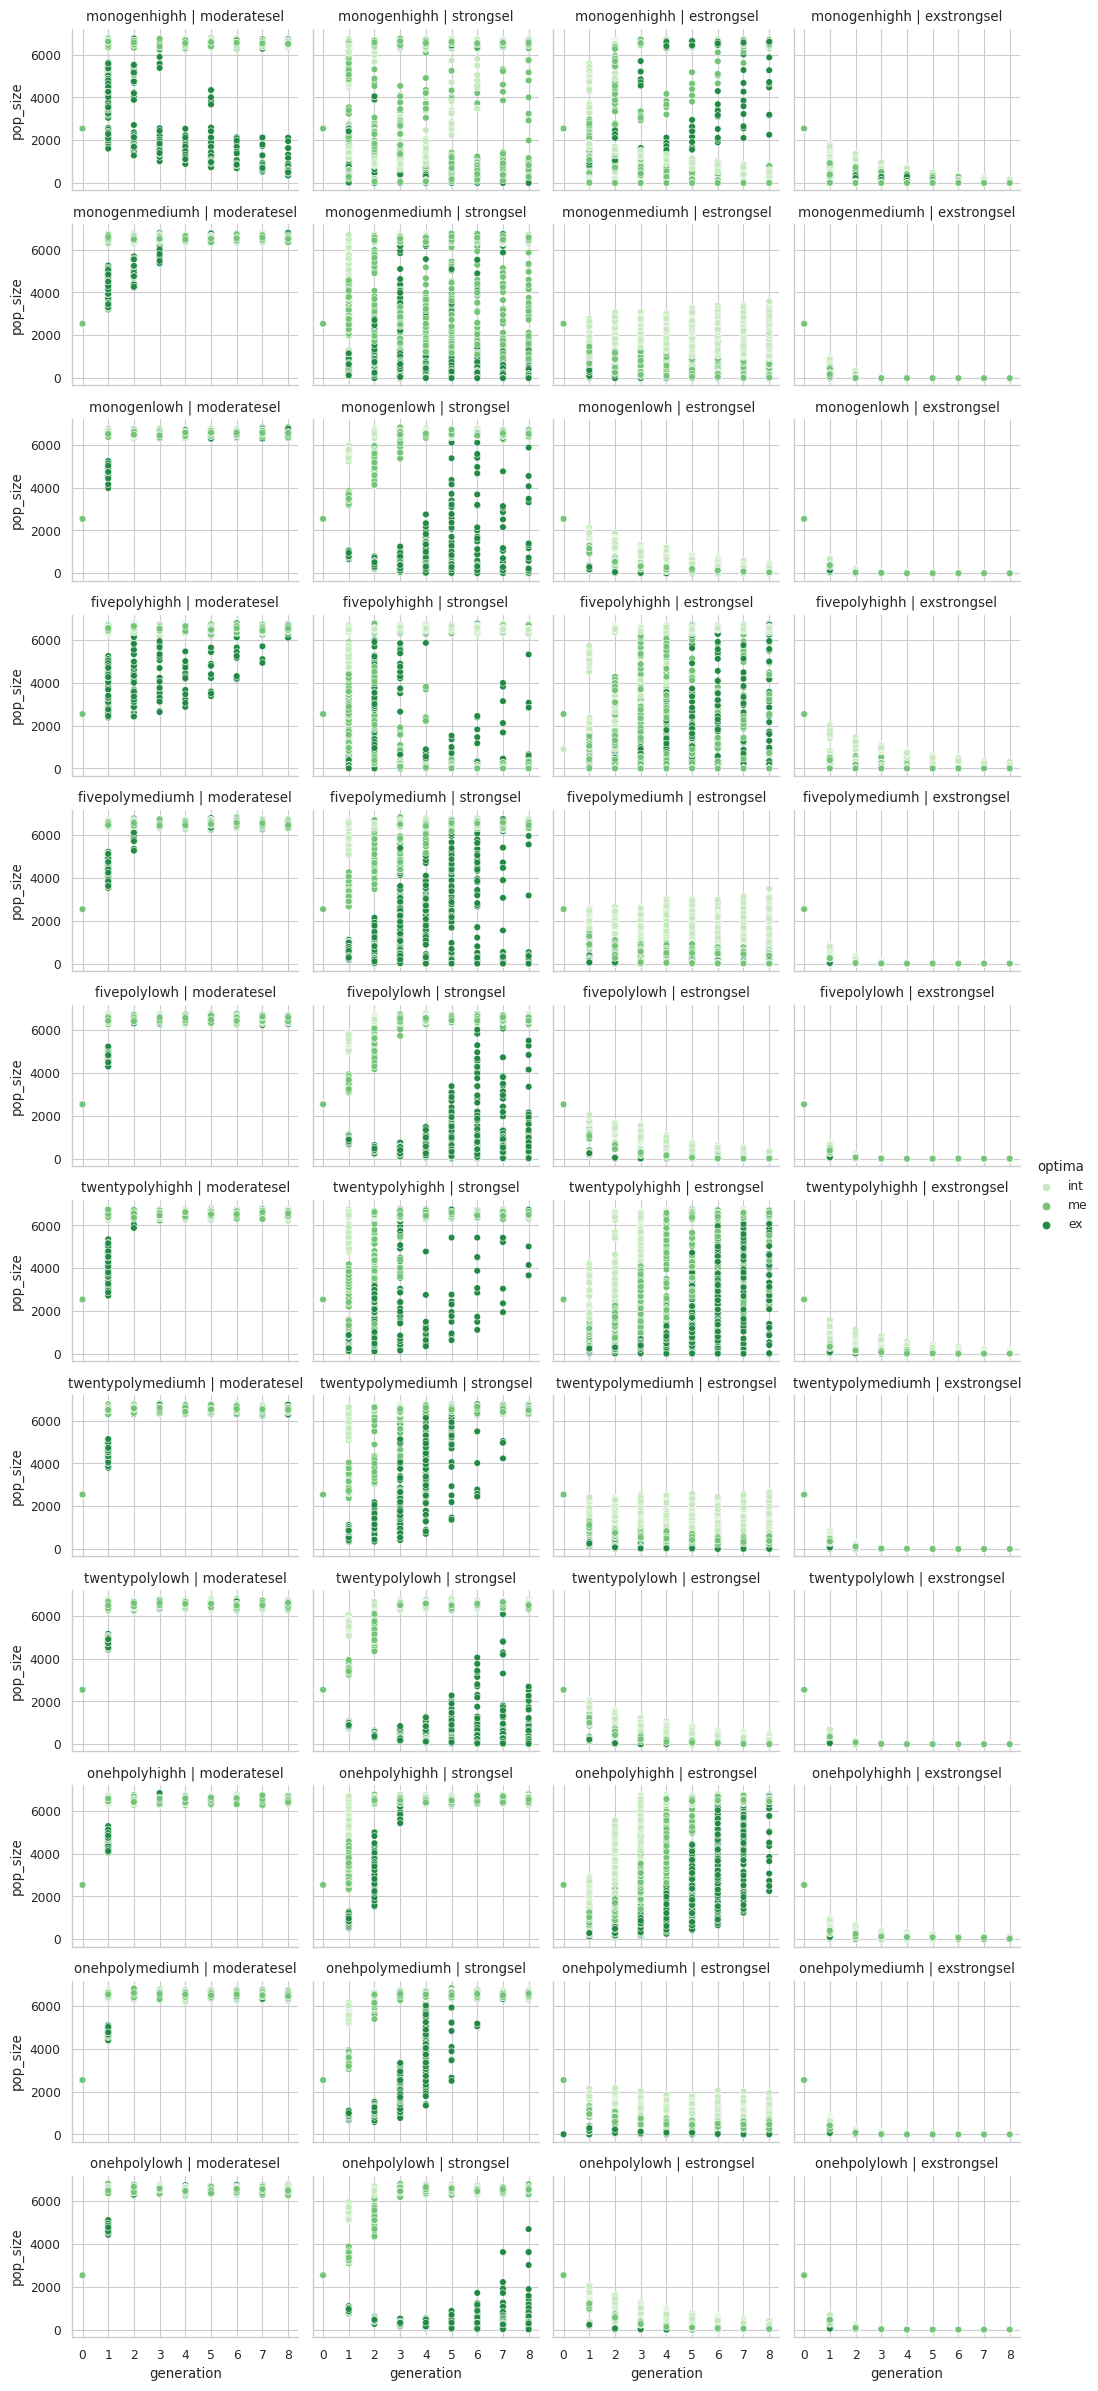

In [335]:
hue_order = ['lowfreq_int', 'mediumfreq_int', 'highfreq_int',
             'lowfreq_me', 'mediumfreq_me', 'highfreq_me',
       'lowfreq_ex', 'mediumfreq_ex', 'highfreq_ex',]

hue_order2 = ['lowfreq', 'mediumfreq', 'highfreq']
optima_order = ['int', 'me', 'ex']


poly_h2_order = ['monogenhighh', 'monogenmediumh', 'monogenlowh',
                'fivepolyhighh', 'fivepolymediumh', 'fivepolylowh',
                'twentypolyhighh', 'twentypolymediumh', 'twentypolylowh',
                'onehpolyhighh', 'onehpolymediumh', 'onehpolylowh',]
greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(hue_order, custom_colors2))

g = sns.relplot(data=melted_pop_size, x="generation", y="pop_size", hue="optima", col="sel", row="poly_h2",
                row_order = poly_h2_order,
                height=2, aspect=1.3,
                palette=greens,
                hue_order=optima_order,
                col_order = sel_order
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')


#g.savefig("Mean_fitness_time.png")
plt.show()

In [338]:
melted_pop_size_me = melted_pop_size[melted_pop_size['optima'] == 'me']

In [343]:
melted_pop_size_me

,optima,sel,h2,poly,freq,rep,poly_h2,freq-optima,generation,pop_size
14,me,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_me,0,2541.0
15,me,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_me,0,2541.0
16,me,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_me,0,2541.0
17,me,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_me,0,2541.0
18,me,moderatesel,highh,monogen,mediumfreq,3,monogenhighh,mediumfreq_me,0,2541.0
...,...,...,...,...,...,...,...,...,...,...
199318,me,exstrongsel,lowh,onehpoly,highfreq,1,onehpolylowh,highfreq_me,8,0.0
199319,me,exstrongsel,lowh,onehpoly,highfreq,1,onehpolylowh,highfreq_me,8,0.0
199320,me,exstrongsel,lowh,onehpoly,highfreq,1,onehpolylowh,highfreq_me,8,0.0
199321,me,exstrongsel,lowh,onehpoly,highfreq,1,onehpolylowh,highfreq_me,8,0.0


In [345]:
melted_pop_size_me['poly'].unique()

array(['monogen', 'onehpoly', 'fivepoly', 'twentypoly'], dtype=object)

In [346]:
poly_order = ['monogen', 'fivepoly', 'twentypoly', 'onehpoly']

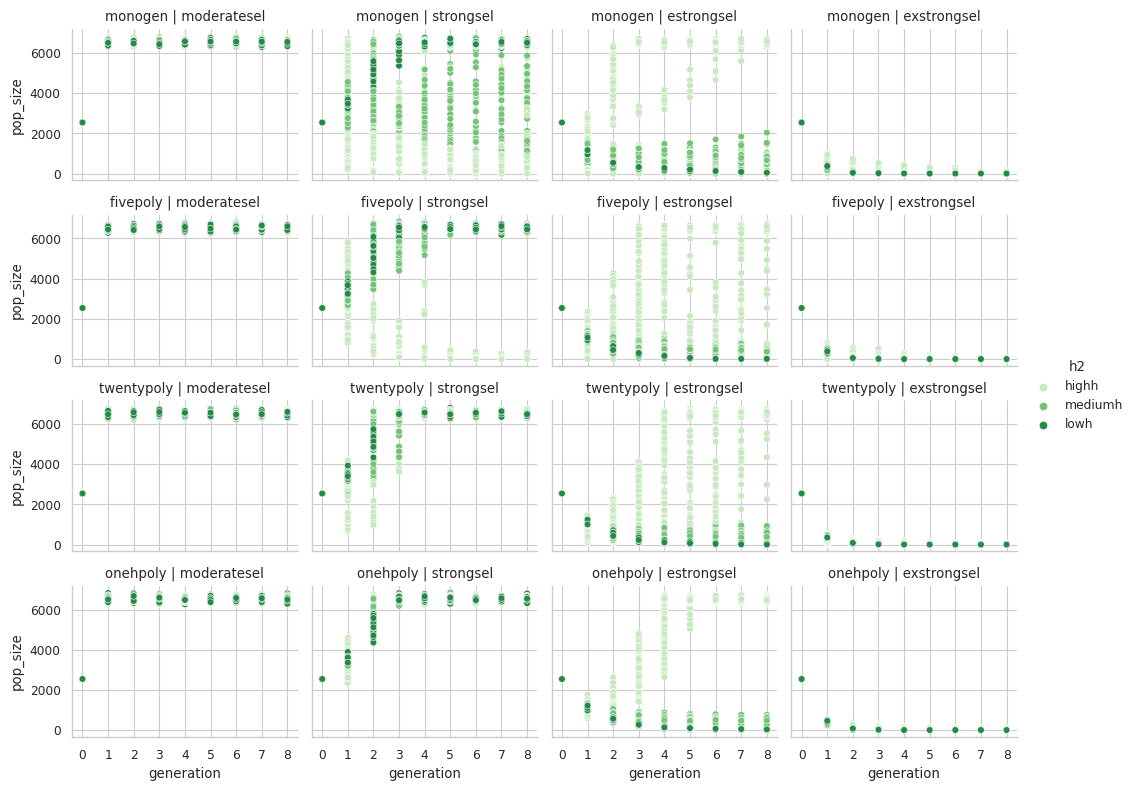

In [347]:
hue_order = ['lowfreq_int', 'mediumfreq_int', 'highfreq_int',
             'lowfreq_me', 'mediumfreq_me', 'highfreq_me',
       'lowfreq_ex', 'mediumfreq_ex', 'highfreq_ex',]

hue_order2 = ['lowfreq', 'mediumfreq', 'highfreq']
optima_order = ['int', 'me', 'ex']

h2_order = ['highh', 'mediumh', 'lowh']
poly_h2_order = ['monogenhighh', 'monogenmediumh', 'monogenlowh',
                'fivepolyhighh', 'fivepolymediumh', 'fivepolylowh',
                'twentypolyhighh', 'twentypolymediumh', 'twentypolylowh',
                'onehpolyhighh', 'onehpolymediumh', 'onehpolylowh',]
greens = sns.color_palette("Greens", n_colors=3)
purples = sns.color_palette("Purples", n_colors=3)
oranges = sns.color_palette("Oranges", n_colors=3)

custom_colors2 = greens + purples + oranges

custom_color_dict2 = dict(zip(hue_order, custom_colors2))

g = sns.relplot(data=melted_pop_size_me, x="generation", y="pop_size", hue="h2", col="sel", row="poly",
                row_order = poly_order,
                height=2, aspect=1.3,
                palette=greens,
                hue_order=h2_order,
                col_order = sel_order
                
           )
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')


#g.savefig("Mean_fitness_time.png")
plt.show()

In [61]:
survival = survival.replace({'optima0': 2, 'optima1': 1, 'optima2': 0, 'optima3': 1, 'optima4': 2})

In [70]:
survival = survival.replace({'lowsel': 0, 'moderatesel': 1, 'strongsel': 2})

In [73]:
survival = survival.replace({'lowfreq': 0, 'mediumfreq': 1, 'highfreq': 2})

In [76]:
survival = survival.replace({'monogen': 1, 'fivepoly': 5, 'twentypoly': 20, 'onehpoly':100})

In [78]:
survival = survival.replace({'highbeta': 1, 'lowbeta': 0})

In [ ]:
sklearn.preprocessing.OneHotEncoder or pandas.get_dummies

In [79]:
survival

,survival,optima,sel,freq,poly,beta
0,1,2,0,2,5,1
1,0,1,0,2,5,1
2,0,0,0,2,5,1
3,0,1,0,2,5,1
4,0,2,0,2,5,1
...,...,...,...,...,...,...
355,1,2,2,1,20,0
356,1,1,2,1,20,0
357,1,0,2,1,20,0
358,1,1,2,1,20,0


In [92]:
X.columns

Index(['optima', 'sel', 'freq', 'poly', 'beta'], dtype='object')

In [80]:
X = survival.drop('survival',axis=1)

In [81]:
Y = survival['survival']

In [82]:
from sklearn import tree

In [86]:
clf = tree.DecisionTreeClassifier(max_depth=6)

In [87]:
clf = clf.fit(X, Y)

In [ ]:
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)


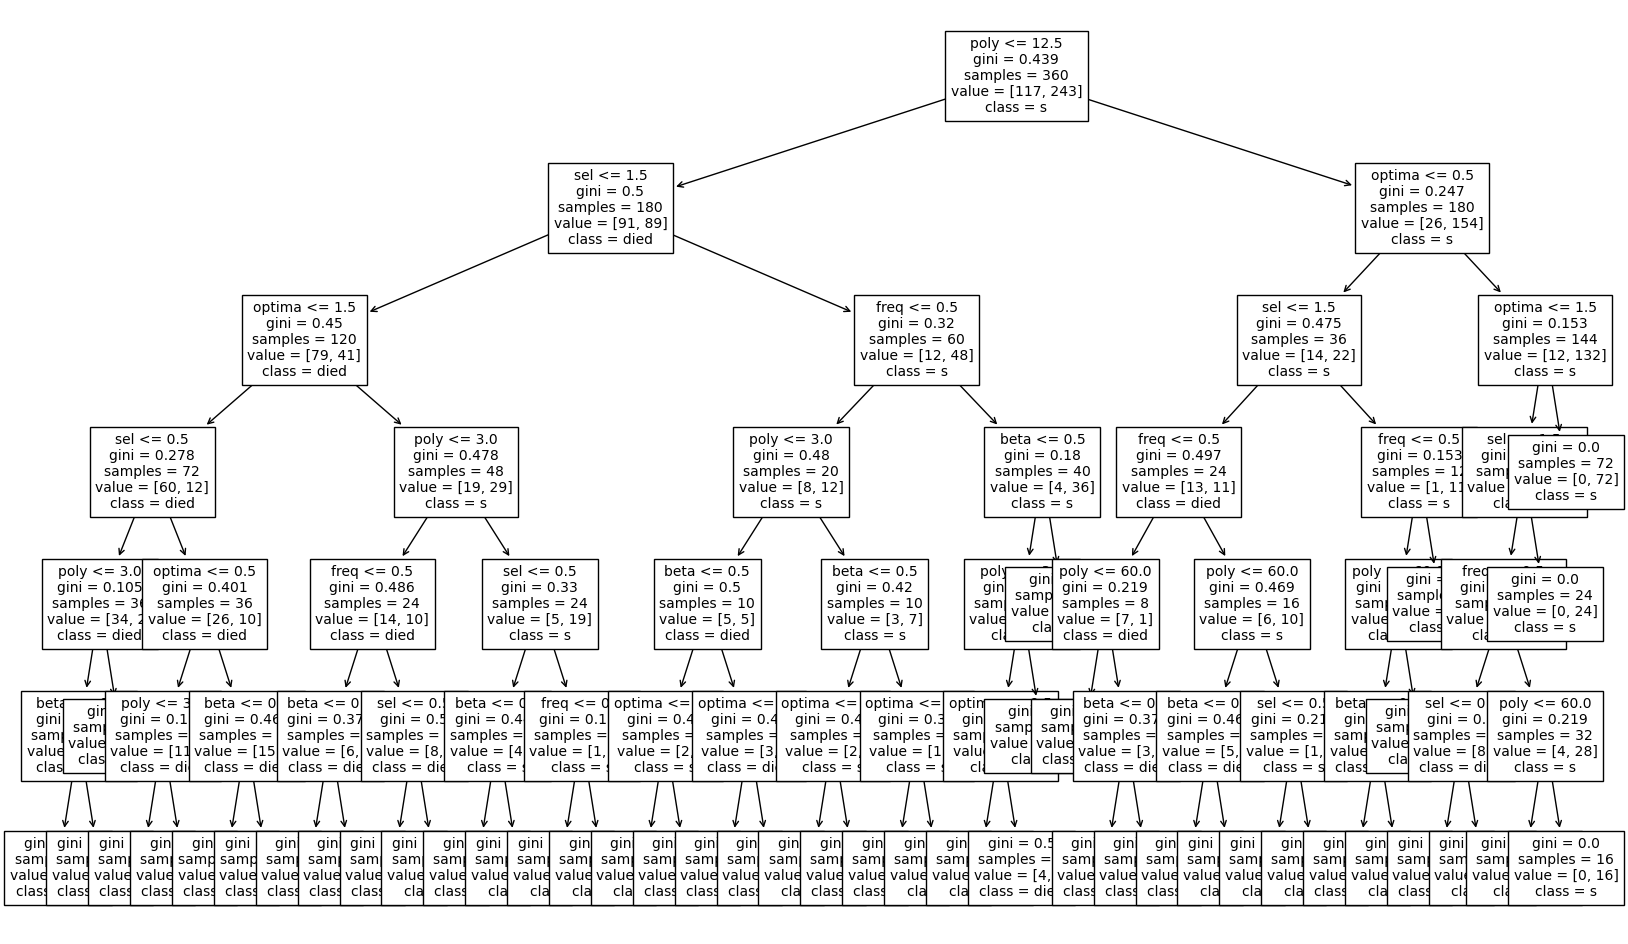

In [96]:

# plot tree
plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10, feature_names = X.columns, class_names=['died', 's'])
plt.show()

[Text(0.6247282608695652, 0.95, 'x[3] <= 12.5\ngini = 0.439\nsamples = 360\nvalue = [117, 243]'),
 Text(0.4016304347826087, 0.85, 'x[1] <= 1.5\ngini = 0.5\nsamples = 180\nvalue = [91, 89]'),
 Text(0.21195652173913043, 0.75, 'x[0] <= 1.5\ngini = 0.45\nsamples = 120\nvalue = [79, 41]'),
 Text(0.06956521739130435, 0.65, 'x[1] <= 0.5\ngini = 0.278\nsamples = 72\nvalue = [60, 12]'),
 Text(0.02608695652173913, 0.55, 'x[3] <= 3.0\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.017391304347826087, 0.45, 'x[4] <= 0.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.008695652173913044, 0.35, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.02608695652173913, 0.35, 'x[2] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.017391304347826087, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.034782608695652174, 0.25, 'x[2] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.02608695652173913, 0.15, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'

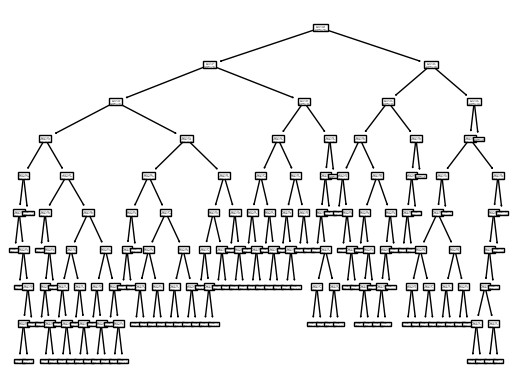

In [85]:
tree.plot_tree(clf);